# INN Hotels Data Analysis and Prediction

# Problem Statement

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Import Libraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

#------------------------------------------------------


# good practice 
#remove warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Loading the dataset

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

## Data Overview and Sanity Check

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
data.shape

(36275, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

In [9]:
# drop Booking_ID because we dont need it
data = data.drop(["Booking_ID"], axis=1)

## Exploratory Data Analysis

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


- no_of_adults: Most bookings include 1 or 2 adults, as reflected by the mean and median values being close to 2. The maximum number of adults per booking is 4.

- no_of_children: The average number of children per booking is very low, with a mean of around 0.1. The maximum number of children in a booking is 10, but the majority of bookings do not include children.

- no_of_weekend_nights: Guests typically book around 0.8 weekend nights, indicating shorter stays over weekends. The distribution is skewed, with 75% of bookings having up to 2 weekend nights, while the maximum is 7.

- no_of_week_nights: The average number of weeknights per stay is around 2.2. Some guests have extended stays, with the maximum number of weeknights reaching 17.

- required_car_parking_space: Most bookings do not require parking, as shown by the low mean (0.03) and the 75th percentile being 0.

- lead_time: The average lead time between booking and arrival is about 85 days. The distribution is skewed, with the median at 57 days, indicating some guests book much earlier.

- arrival_year: Most bookings were made in 2018, as the mean and median both indicate this year.

- arrival_month: Bookings are spread across the year, with the average arrival month around July and August. The 25th percentile (May) and 75th percentile (October) suggest a fairly even distribution across the year.

- arrival_date: The average arrival date is mid-month, with a mean of 15.6, and bookings are spread throughout the entire month.

- repeated_guest: A small fraction of guests (around 2.6%) are repeat visitors, as indicated by the low mean of 0.03.

- no_of_previous_cancellations: Most bookings have no prior cancellations, with the mean and median both at 0. However, a small percentage (about 2.3%) of bookings show prior cancellations, with a maximum of 13.

- no_of_previous_bookings_not_canceled: The average number of previous bookings not canceled is around 0.15. The distribution is skewed, with most bookings having no previous uncanceled bookings, though the maximum is 58.

- avg_price_per_room: 
    - The average room rate is approximately \\$103.4, with a standard deviation of \\$35.1.
    - The minimum price is 0, suggesting some bookings were free or had special rates.
    - The maximum price is $540, indicating high-priced room bookings.

- no_of_special_requests: On average, guests make about 0.6 special requests per booking. The distribution is skewed, with the median being 0 and the maximum number of special requests being 5.


**The below functions need to be defined to carry out the EDA.**

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Combines a histogram and a boxplot for the given feature.

    Parameters:
    data: DataFrame containing the dataset.
    feature: Column to visualize.
    figsize: Size of the figure (default is (15,10)).
    kde: Boolean indicating if kernel density estimate should be displayed (default is True).
    bins: Number of bins for the histogram (default is None).

    Returns:
    A plot combining a boxplot and histogram for the given feature.
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Create two rows in the subplot
        sharex=True,  # Share x-axis between the subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )  # Setting the layout of the subplots

    sns.boxplot(
        x=feature, data=data, ax=ax_box, showmeans=True, color="violet"
    )  # Generate a boxplot and mark the mean with a triangle

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, bins=bins, ax=ax_hist)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)  # Plot the histogram

    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")  # Mark the mean on the histogram
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-")  # Mark the median on the histogram


In [12]:
# Function to generate bar plots with labels
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Creates a barplot with count or percentage labels on top.

    Parameters:
    data: DataFrame containing the dataset.
    feature: Column to visualize.
    perc: Boolean to indicate whether to display percentages instead of counts (default is False).
    n: Specifies the top n categories to display (default is None, which shows all categories).

    Returns:
    A bar plot with labels displaying either counts or percentages for each category.
    """

    total_count = len(data[feature])  # Total number of values in the feature
    unique_count = data[feature].nunique()  # Number of unique categories

    # Set figure size based on the number of unique categories or top 'n' categories
    if n is None:
        plt.figure(figsize=(unique_count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],  # Order categories by count
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total_count
            )  # Calculate percentage
        else:
            label = p.get_height()  # Display count

        x = p.get_x() + p.get_width() / 2  # X-coordinate for label placement
        y = p.get_height()  # Y-coordinate for label placement

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the bar with the label

    plt.show()  # Display the plot


In [13]:
def stacked_barplot(data, predictor, target):
    """
    Displays category counts and generates a stacked bar chart.

    Parameters:
    data: DataFrame containing the dataset.
    predictor: Independent variable (categorical feature).
    target: Dependent variable (target or outcome).

    Returns:
    A stacked bar plot showing the relationship between the predictor and the target variable.
    """

    # Count the number of unique categories in the predictor variable
    unique_count = data[predictor].nunique()

    # Sort the data based on the least common target category
    least_common_target = data[target].value_counts().index[-1]

    # Display the count table of predictor vs. target categories
    count_table = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=least_common_target, ascending=False
    )
    print(count_table)
    print("-" * 120)

    # Normalize the table for the stacked bar plot (percentages)
    normalized_table = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=least_common_target, ascending=False
    )

    # Create a stacked bar plot
    normalized_table.plot(kind="bar", stacked=True, figsize=(unique_count + 5, 5))

    # Display the legend
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()


In [14]:
# Function to plot distributions with respect to the target variable
def distribution_plot_wrt_target(data, predictor, target):
    """
    Plots distribution and boxplots of the predictor variable with respect to the target variable.

    Parameters:
    data: DataFrame containing the dataset.
    predictor: The feature whose distribution is being analyzed.
    target: The target or outcome variable.

    Returns:
    A set of distribution plots and boxplots to analyze the predictor variable in relation to the target.
    """

    # Create a 2x2 grid of subplots for distribution and box plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get unique values of the target variable
    target_unique_vals = data[target].unique()

    # Plot histogram for the first category of the target variable
    axs[0, 0].set_title("Distribution for target = " + str(target_unique_vals[0]))
    sns.histplot(
        data=data[data[target] == target_unique_vals[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Plot histogram for the second category of the target variable
    axs[0, 1].set_title("Distribution for target = " + str(target_unique_vals[1]))
    sns.histplot(
        data=data[data[target] == target_unique_vals[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Create a boxplot for the predictor with respect to the target
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Create a boxplot without outliers for the predictor with respect to the target
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

### Univariate Analysis

#### Observations on lead time

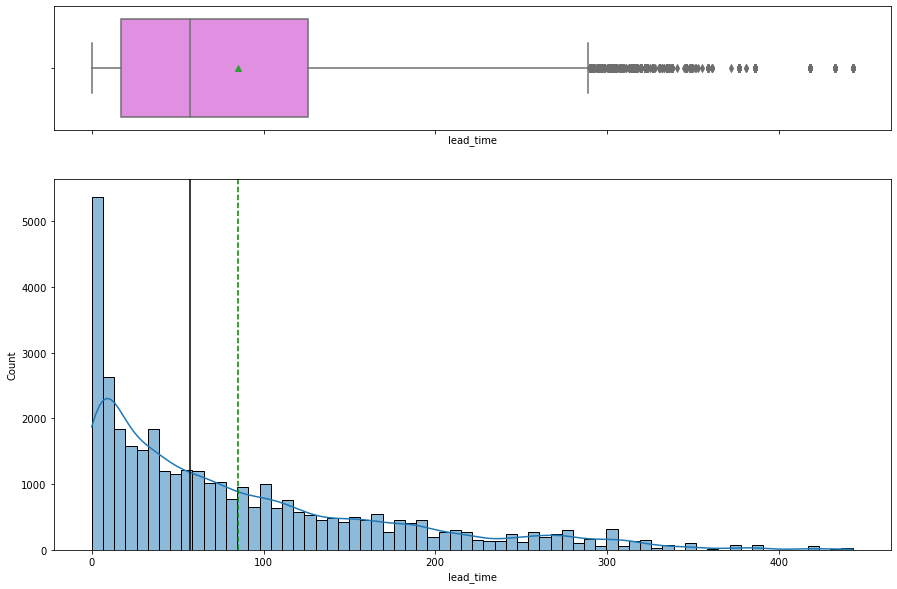

In [15]:
histogram_boxplot(data, "lead_time")

- A significant number of clients booked their stay on the day of arrival (day 0).
- The lead time distribution is right-skewed, indicating the presence of numerous outliers.
- Interestingly, some customers made reservations between 100 to 500 days in advance.

#### Observations on average price per room

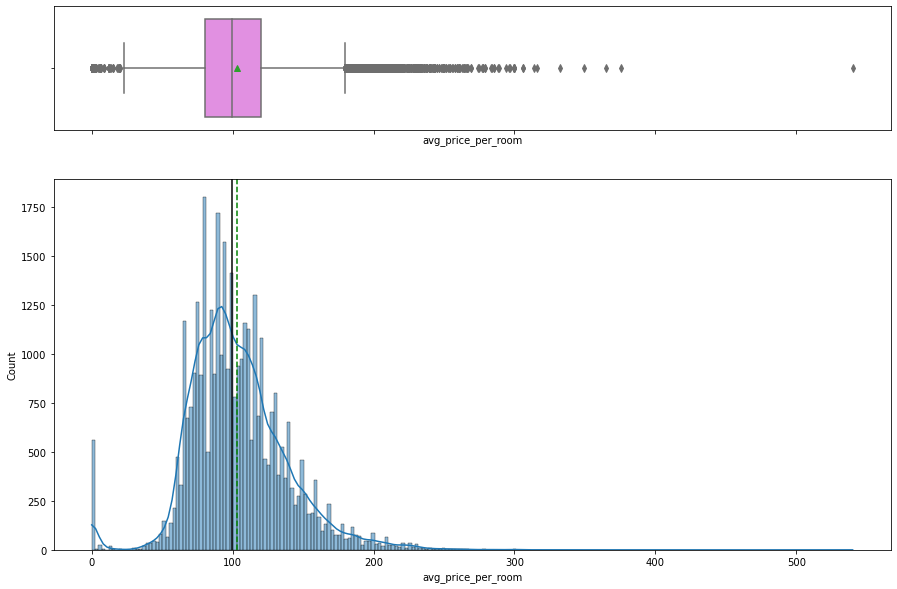

In [16]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution of the average room price is right-skewed, with outliers present on both ends.
* The typical price for a room is approximately 100 euros.
* There is one instance where the average room price exceeds 500 euros; we will clip this value to the upper whisker (Q3 + 1.5 * IQR).
* Some rooms are listed at a price of 0 euros, which requires further investigation.

In [17]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [18]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

- A number of rooms are priced at 0 euros, indicating they are given for free.
- In the market segment column, many values appear to be complementary.
- The rooms reserved online likely result from a promotional campaign run by the hotel.

- we will deal with the extreme outliers

In [19]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [20]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Observations on number of previous booking cancellations

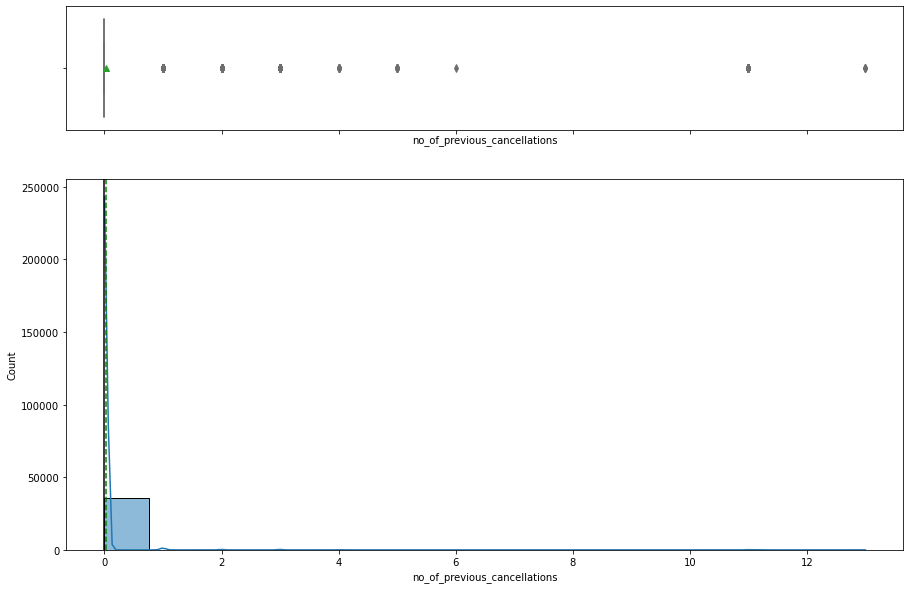

In [21]:
histogram_boxplot(data, "no_of_previous_cancellations")

* The customers who previously cancelled, have canceled mostly one time.
* however, some customers canceled more than 12 times.

#### Observations on number of previous booking not canceled

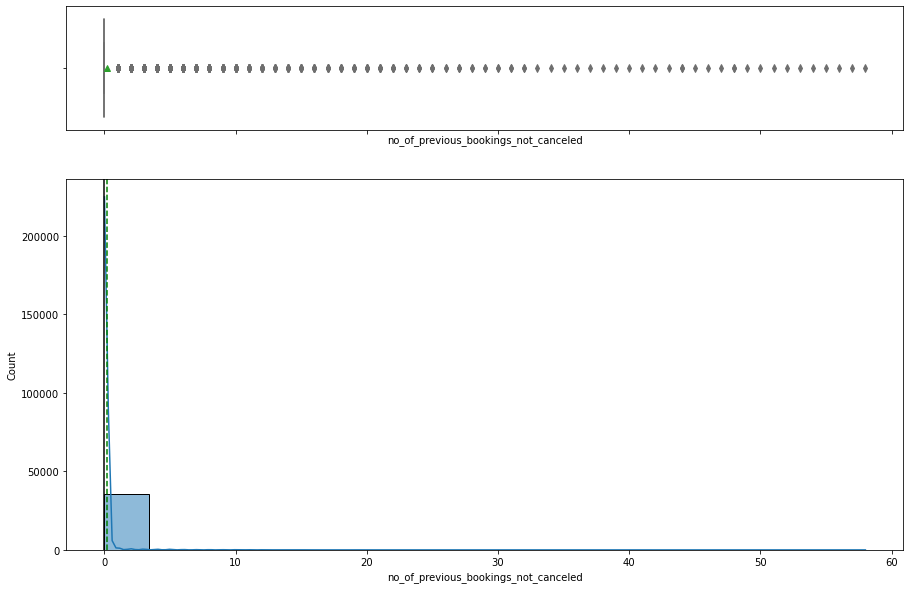

In [22]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on number of adults

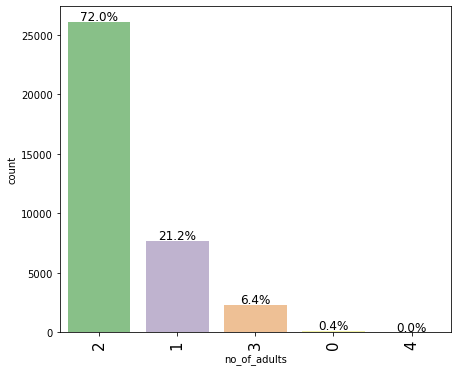

In [24]:
labeled_barplot(data, "no_of_adults", perc=True)

* A significant 72% of the bookings were for 2 adults, while 21% were for 1 adult. This suggests that the hotel is particularly appealing to couples and solo travelers.

#### Observations on number of children

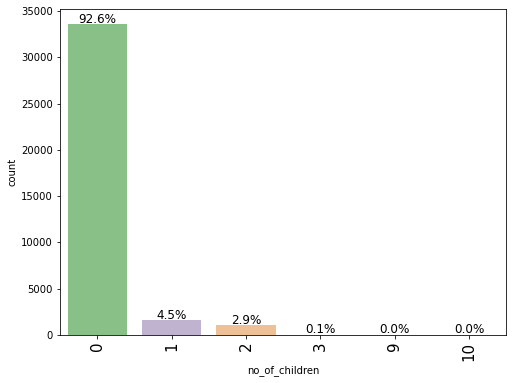

In [25]:
labeled_barplot(data, "no_of_children", perc=True)

* A notable 93% of customers did not make reservations for children.
* There are instances in the data where the number of children is recorded as 9 or 10, which is highly improbable.
* We will replace these values with the maximum allowable number of 3 children.

In [26]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

#### Observations on number of week nights

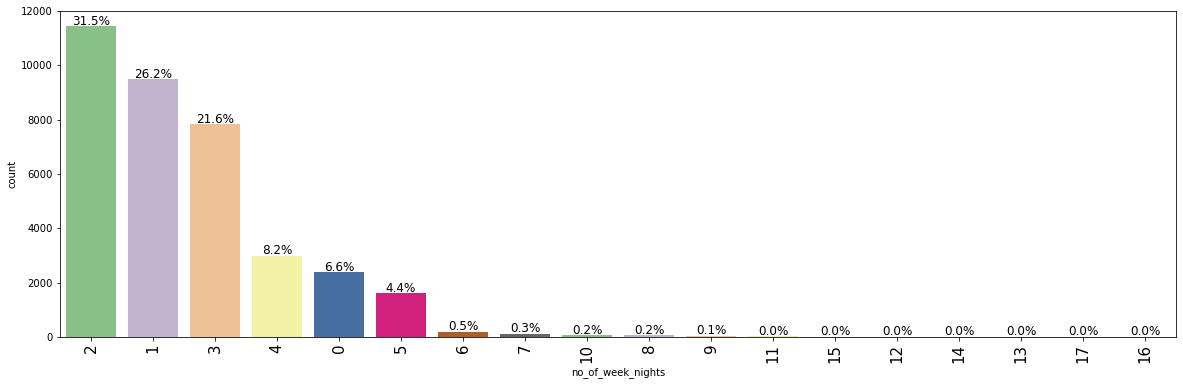

In [27]:
labeled_barplot(data, "no_of_week_nights", perc=True)

* Most bookings are made for 2 nights (31.5%) and 1 night (26.2%) and 3 nights (21.6%).

#### Observations on number of weekend nights

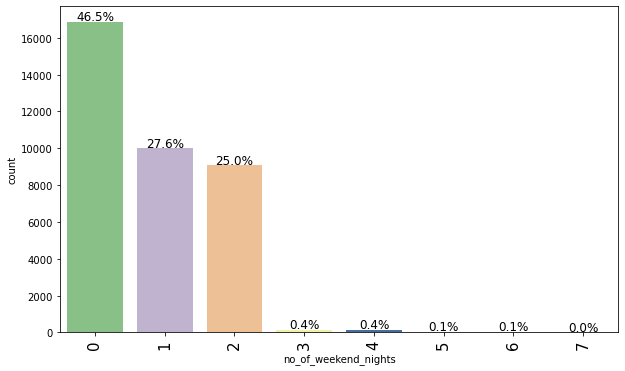

In [28]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

* Approximately 46.5% of customers do not intend to spend the weekend at the hotel.
* The proportion of customers planning to stay for 1 or 2 weekends is nearly identical.

#### Observations on required car parking space

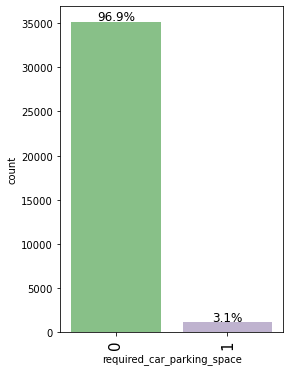

In [29]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 96.9% of the customers do not require a car parking space.

#### Observations on type of meal plan

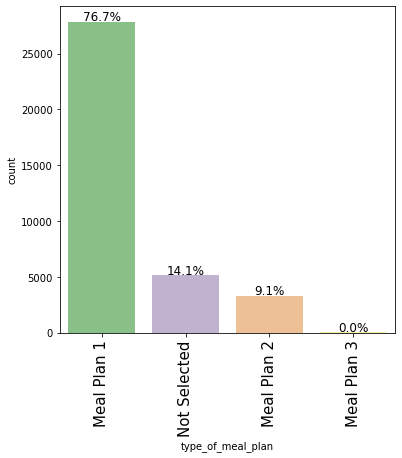

In [30]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* Most of the customers prefer meal plan 1 (breakfast).
* 14.1% of the customers didn't select a meal plan.

#### Observations on room type reserved

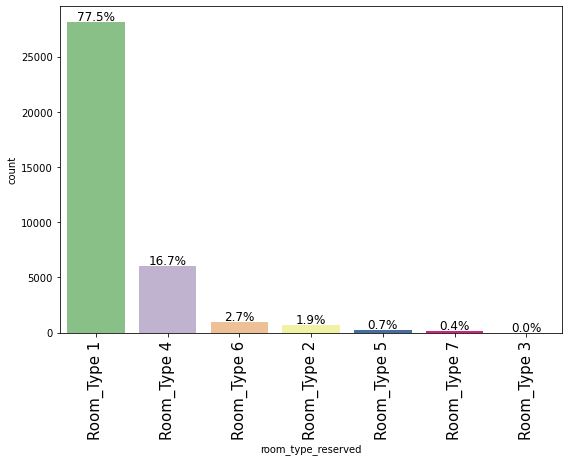

In [31]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Around 77% of the customers booked Room_Type 1 followed by 17% of the customers booking Room_Type 4.

#### Observations on arrival month

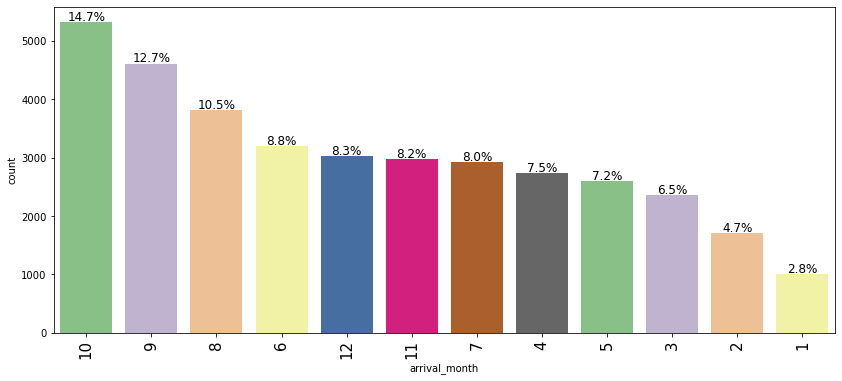

In [32]:
labeled_barplot(data, "arrival_month", perc=True)

* October is the busiest month for the hotel followed by September.
* 14.7% of the bookings were made in October.

#### Observations on market segment type

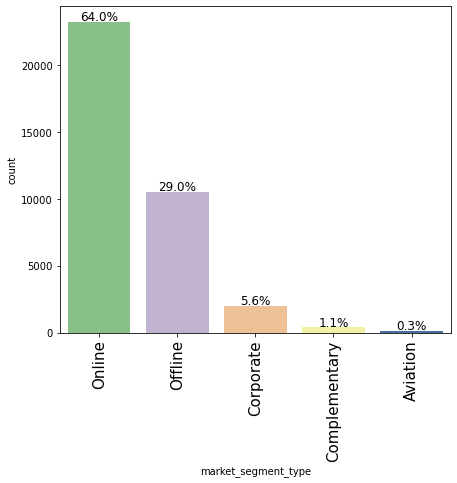

In [33]:
labeled_barplot(data, "market_segment_type", perc=True)

* 64% of the hotel bookings were made online followed by 29% of the bookings which were made offline.

#### Observations on number of special requests

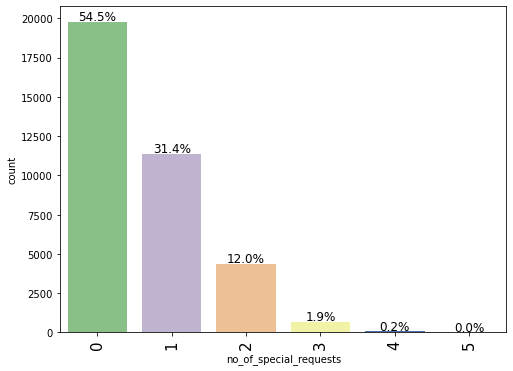

In [34]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* 54.5% of the customers generally do not make any requests while booking a hotel room.

#### Observations on booking status

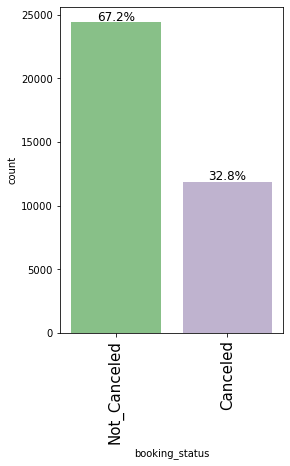

In [35]:
labeled_barplot(data, "booking_status", perc=True)

* 32.8% of the bookings were canceled by the customers.

In [36]:
# Encode Canceled bookings to 1 and Not_Canceled as 0
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### 3 Bivariate Analysis

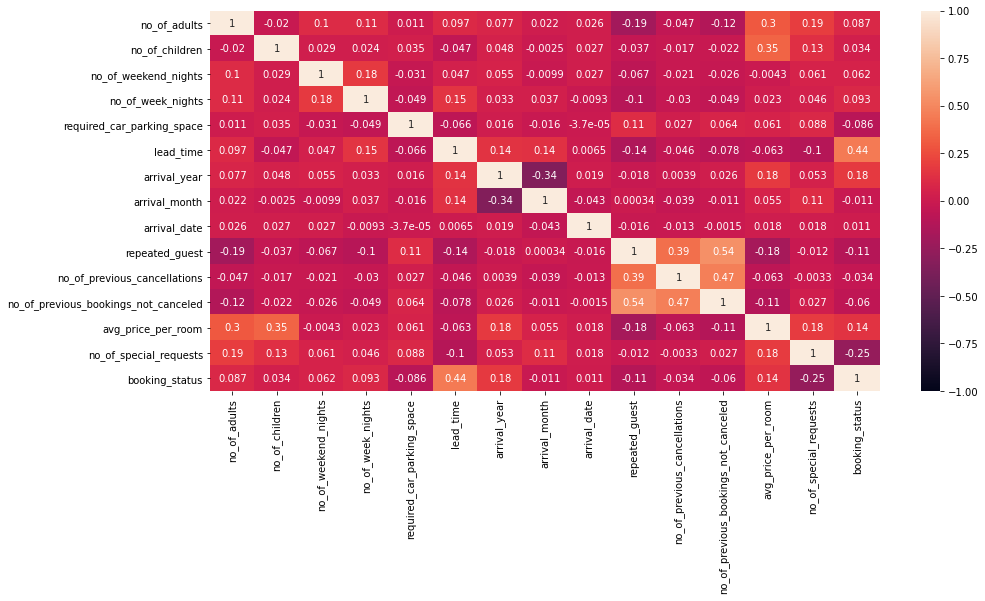

In [37]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
    * This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest. 
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

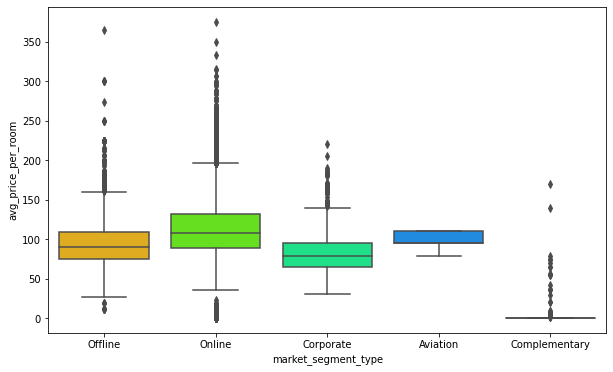

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Online bookings exhibit significant price variations for rooms.
* Prices for offline and corporate bookings are nearly identical.
* The complementary market segment benefits from considerably lower room prices, which is logical.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


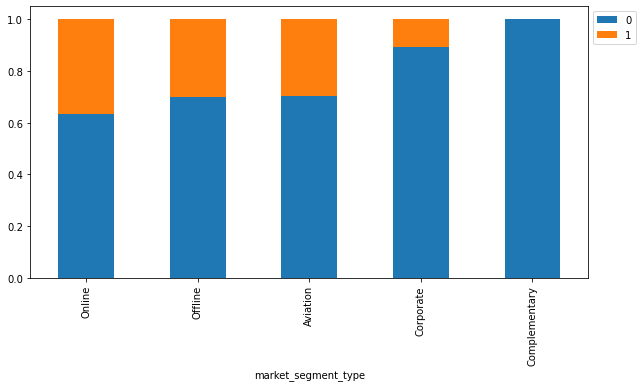

In [39]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Around 40% of the online booking were canceled.
* Bookings made offline are less prone to cancellations.
* Corporate segment shows very low cancellations.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


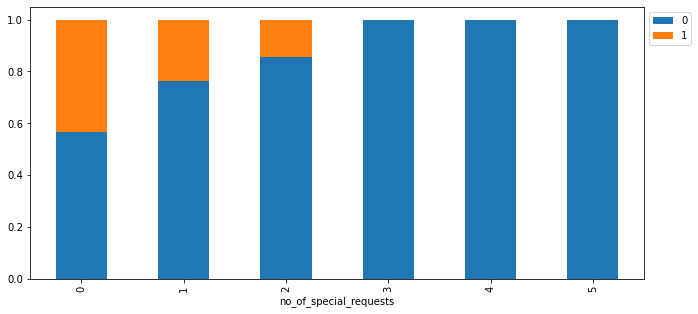

In [40]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.

**Let's see if the special requests made by the customers impacts the prices of a room**

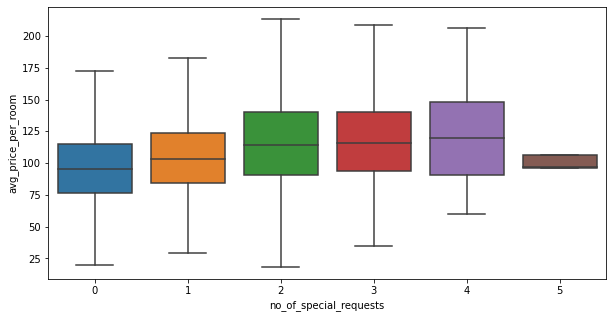

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

* The median prices of the rooms where some special requests were made by the customers are slightly higher than the rooms where customer didn't make any requests.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

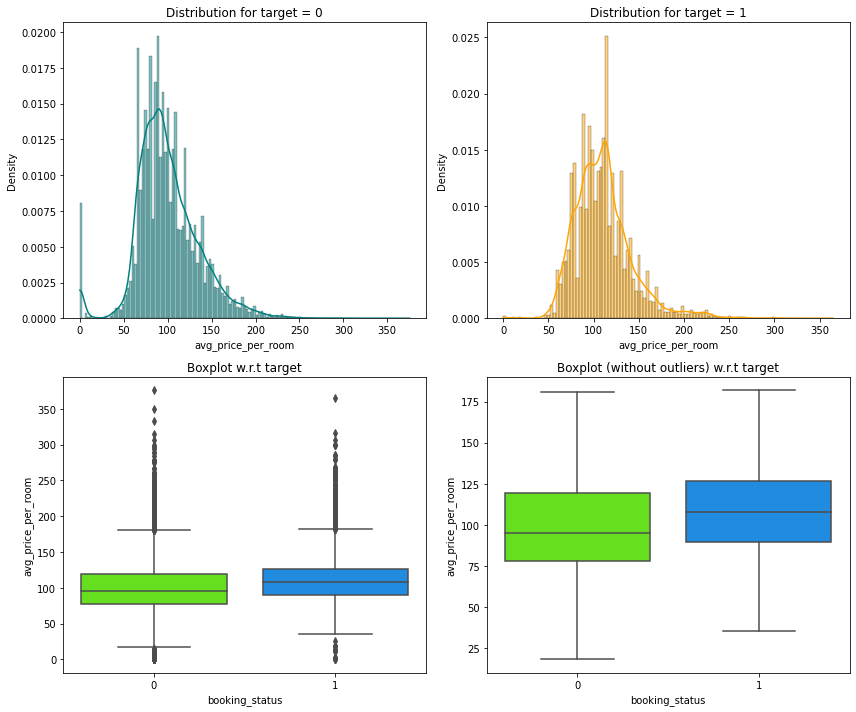

In [42]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The distribution of price for canceled bookings and not canceled bookings is quite similar.
* The prices for the canceled bookings are slightly higher than the bookings which were not canceled.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

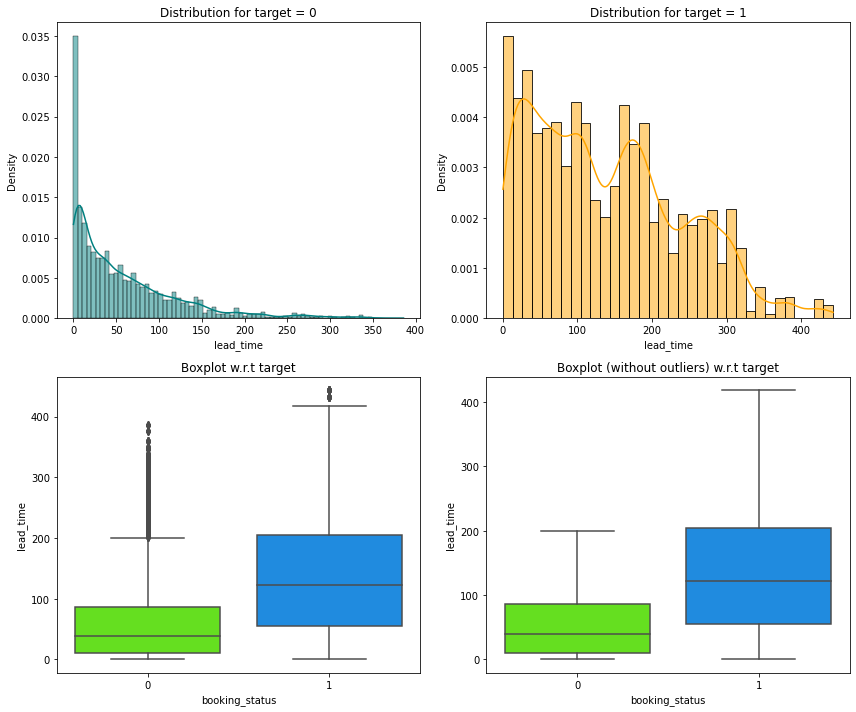

In [43]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
* Higher the lead time higher are the chances of a booking being canceled.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [44]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [45]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


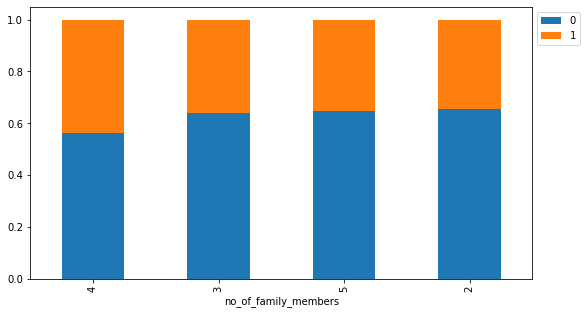

In [46]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* There's a ~40% chance of a booking getting canceled if the booking is made for 4 family members.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [47]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [48]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

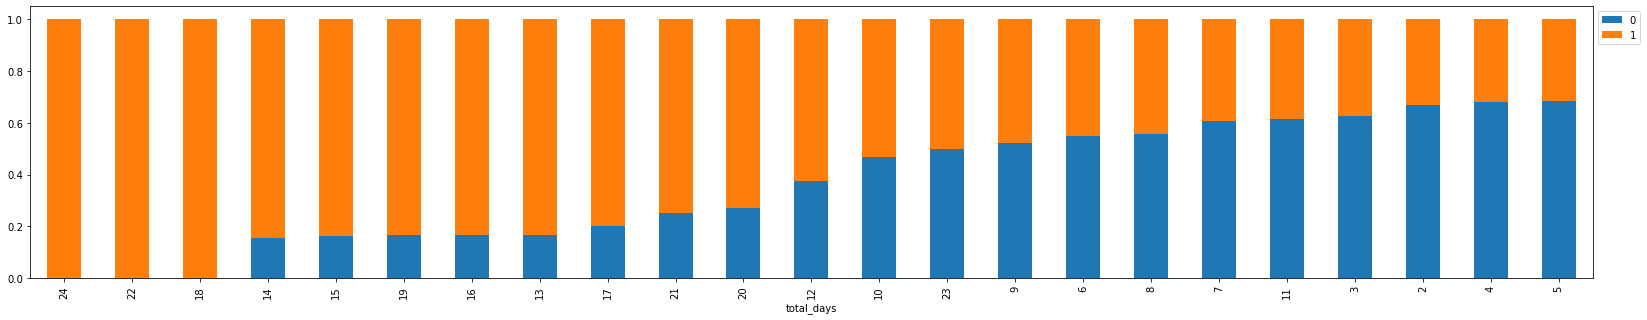

In [49]:
stacked_barplot(stay_data, "total_days", "booking_status")

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


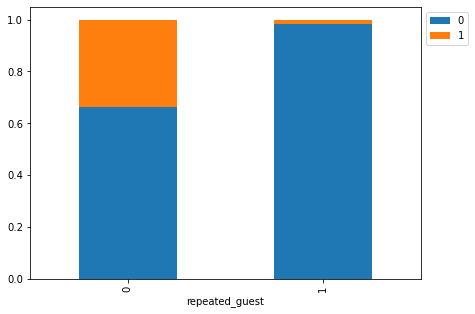

In [50]:
stacked_barplot(data, "repeated_guest", "booking_status")

* The number of repeat customers is low, but the cancellation rate among them is minimal.
* This reflects positively, as repeat customers are vital for the hospitality industry due to their potential for word-of-mouth promotion.
* Loyal guests tend to be more profitable for businesses, as they are already familiar with the offerings of a hotel they have previously visited.
* Acquiring new customers is often more challenging and costly compared to retaining repeat guests.

**Let's find out what are the busiest months in the hotel.**

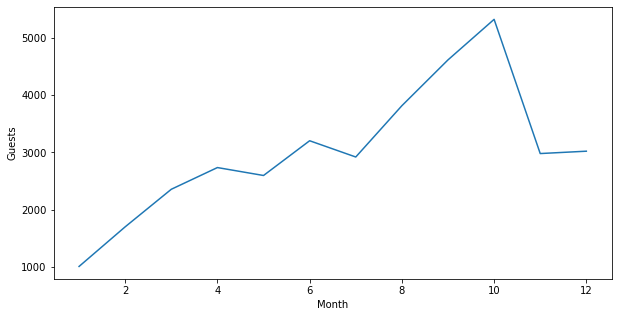

In [51]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
* Most bookings were made in October - more than 5000 bookings. 
* Least bookings were made in January - around 1000 bookings.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


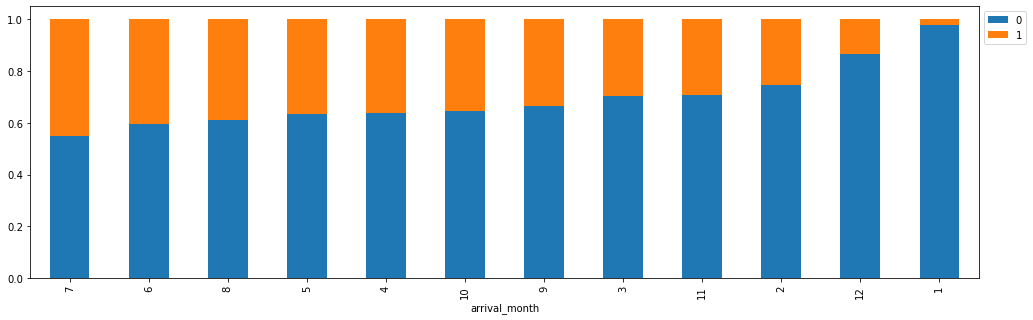

In [52]:
stacked_barplot(data, "arrival_month", "booking_status")

* We see that even though the highest number of bookings were made in September and October - around 40% of these bookings got canceled.
* Least bookings were canceled in December and January - customers might have traveled to celebrate Christmas and New Year.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

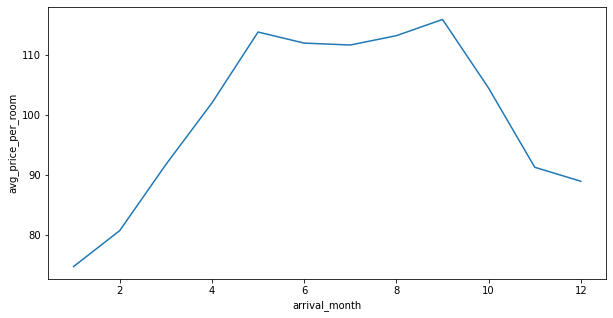

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

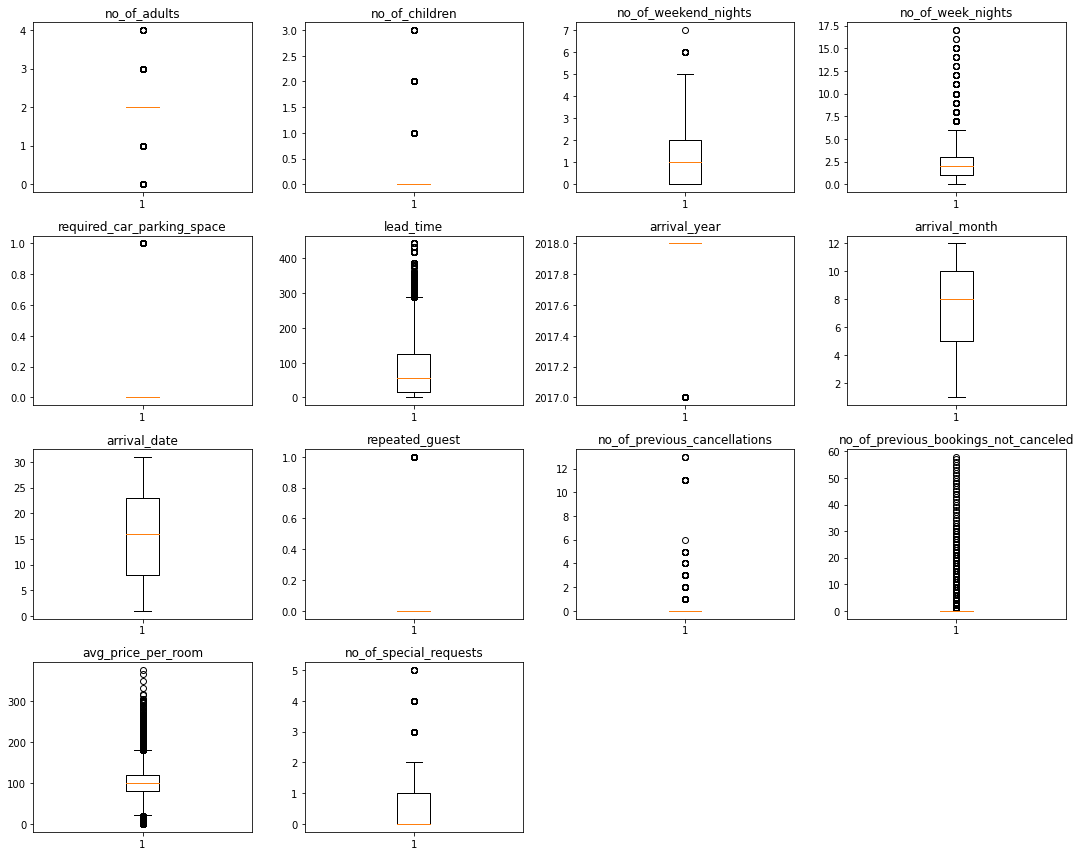

In [54]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- although outliers exist, we will keep them as they may have a valuable input.

# Model Building

## Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

In [55]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [56]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### Building Logistic Regression Model

In [57]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3292
Time:                        23:05:47   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.001
no_of_adults                             0.1137      

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [58]:
# Function to evaluate the performance metrics of a classification model using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Evaluate various metrics to assess the performance of a classification model.

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: the cutoff for classifying an observation as class 1
    """

    # Determine which probabilities exceed the threshold
    pred_temp = model.predict(predictors) > threshold
    # Convert boolean values to binary classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # Calculate accuracy
    recall = recall_score(target, pred)  # Calculate recall
    precision = precision_score(target, pred)  # Calculate precision
    f1 = f1_score(target, pred)  # Calculate F1 score

    # Create a DataFrame to hold the performance metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [59]:
# Function to plot the confusion matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Plot the confusion matrix along with percentages.

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: cutoff for classifying an observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()


**Observations**

- Negative coefficients indicate that as the corresponding attribute value increases, the likelihood of customers canceling their bookings decreases.

- Positive coefficients suggest that an increase in the corresponding attribute value leads to a higher probability of customers canceling their bookings.

- The p-value of a variable indicates its significance. A variable is considered significant if its p-value is less than the significance level of 0.05 (5%).

- However, the presence of multicollinearity in these variables can impact the p-values.

* To obtain reliable coefficients and p-values, we need to address multicollinearity in the data.

* Various methods exist to detect multicollinearity, one of which is the Variation Inflation Factor (VIF).

In [60]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train.astype(float), y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


### Multicollinearity

In [61]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [62]:
checking_vif(X_train.astype(float))

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Removing Variables with High p-Values

- Predictor variables with a p-value exceeding 0.05 will be removed, as they do not significantly influence the target variable.

- It's important to note that p-values can change after a variable is removed, so we won't drop all variables simultaneously.

- The following steps will be taken:
    - Build an initial model, assess the p-values of the predictor variables, and eliminate the one with the highest p-value.
    - Create a new model without the excluded feature, check the p-values again, and remove the variable with the highest p-value.
    - Repeat these two steps until no variables have a p-value greater than 0.05.

While this process can be executed manually by selecting one variable at a time for removal, using a loop to automate the process will be more efficient and less tedious.

In [63]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train.astype(float)[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [64]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [65]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3282
Time:                        23:05:49   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [66]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


* All remaining variables have p-values less than 0.05.
* Therefore, we can conclude that lg1 is the most suitable model for drawing any inferences.
* The model's performance on the training data remains consistent with the performance observed prior to removing the variables with high p-values.

### Coefficient interpretations

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

#### Let's check the performance on the test set

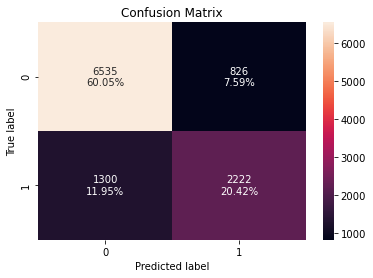

In [67]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

In [68]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float)
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [69]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,0.00000,-100.00000
no_of_adults,1.11491,11.49096
no_of_children,1.16546,16.54593
no_of_weekend_nights,1.11470,11.46966
no_of_week_nights,1.04258,4.25841
required_car_parking_space,0.20296,-79.70395
lead_time,1.01583,1.58331
arrival_year,1.57195,57.19508
arrival_month,0.95839,-4.16120
repeated_guest,0.06478,-93.52180


### Coefficient Interpretations

* `no_of_adults`: Keeping all other features constant, a one-unit increase in the number of adults is associated with a 1.11 times increase in the odds of a booking being canceled, reflecting an 11.49% rise in cancellation odds.
* `no_of_children`: Holding all other factors constant, a one-unit increase in the number of children leads to a 1.16 times increase in the odds of cancellation, indicating a 16.54% increase in these odds.
* `no_of_weekend_nights`: With all other variables held constant, a one-unit increase in weekend nights results in a 1.11 times increase in cancellation odds, translating to an 11.46% rise.
* `no_of_week_nights`: Maintaining all other variables constant, a one-unit increase in week nights correlates with a 1.04 times increase in the odds of cancellation, corresponding to a 4.25% increase.
* `required_car_parking_space`: Customers needing car parking have 0.2 times lower odds of cancellation compared to those who do not require parking, indicating a 79.70% reduction in cancellation odds.
* `lead_time`: Keeping all other factors constant, a one-unit increase in lead time is associated with a 1.01 times increase in cancellation odds, signifying a 1.58% rise.
* `no_of_special_requests`: Holding all other features constant, a one-unit increase in special requests decreases the odds of cancellation by 0.22 times, which represents a 77% reduction in cancellation odds.
* `avg_price_per_room`: With all other factors held constant, a one-unit increase in average room price is linked to a 1.01 times increase in cancellation odds, indicating a 1.93% increase.
* `type_of_meal_plan_Not Selected`: Customers who do not select a meal plan have 1.33 times higher odds of cancellation compared to those who select a meal plan, reflecting a 33.10% increase in cancellation odds, with all other meal plans as the reference.

`Similar interpretations can be applied to other attributes.`

#### Checking model performance on the training set

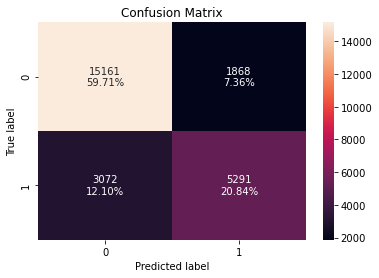

In [70]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

In [71]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float)
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


#### ROC-AUC
* ROC-AUC on training set

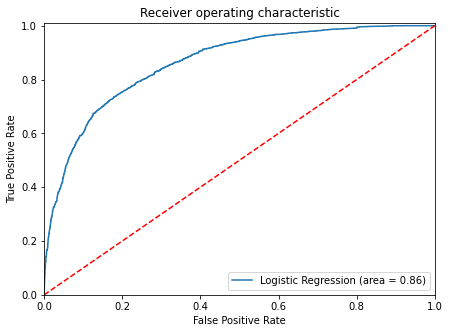

In [72]:
logit_roc_auc_train = roc_auc_score(y_train.astype(float), lg1.predict(X_train1.astype(float).astype(float)))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [73]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587082435


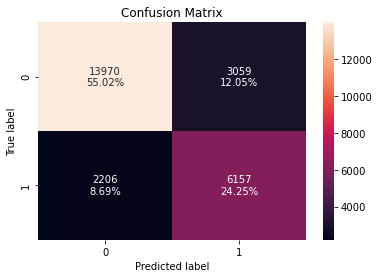

In [74]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

#### Let's check the performance on the test set

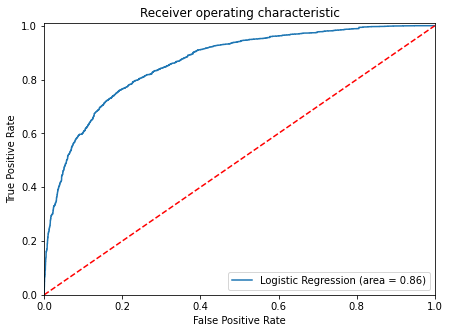

In [76]:
logit_roc_auc_train = roc_auc_score(y_test.astype(float), lg1.predict(X_test1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), lg1.predict(X_test1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

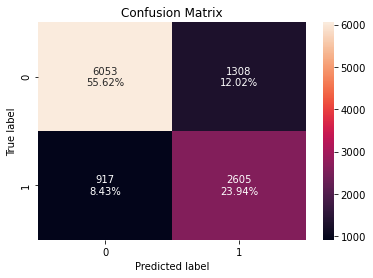

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc)

In [78]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


#### Let's use Precision-Recall curve and see if we can find a better threshold

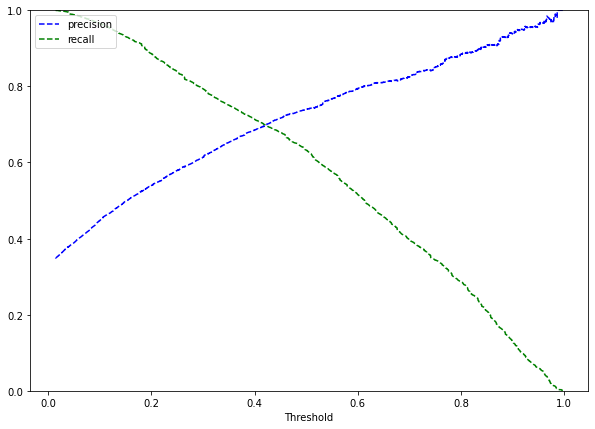

In [79]:
y_scores = lg1.predict(X_train1.astype(float))
prec, rec, tre = precision_recall_curve(y_train.astype(float), y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

In [80]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

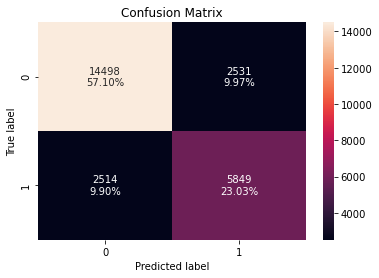

In [81]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve)

In [82]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

#### Let's check the performance on the test set

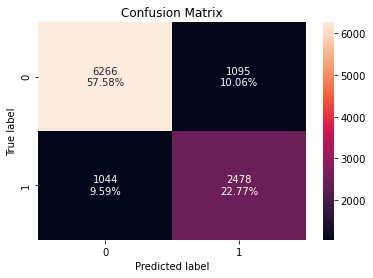

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)

In [84]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


### Model performance summary

In [85]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [86]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


### Observations from the Logistic Regression Model

- A predictive model has been successfully developed that enables the hotel to forecast which bookings are likely to be canceled, achieving an F1 score of 0.69 on the training set. This insight can help shape effective marketing strategies.

* The logistic regression models demonstrate consistent performance across both the training and testing datasets.

* **With the default threshold, the model yields low recall but high precision:** This allows the hotel to accurately predict which bookings are unlikely to be canceled, enabling them to provide quality service to these customers and maintain brand equity, albeit with some resource loss.

* **At a 0.37 threshold, the model achieves high recall but low precision:** While this helps the hotel conserve resources by accurately identifying likely cancellations, it may risk damaging brand equity due to potential service shortcomings.

* **With a 0.42 threshold, the model strikes a balance between recall and precision:** This setting allows the hotel to effectively manage resources while also safeguarding brand reputation.

* Negative coefficients for variables like `required_car_parking_space`, `arrival_month`, `repeated_guest`, and `no_of_special_requests` indicate that increases in these factors are associated with a reduced likelihood of booking cancellations.

* Conversely, positive coefficients for variables such as `no_of_adults`, `no_of_children`, `no_of_weekend_nights`, `no_of_week_nights`, `lead_time`, `avg_price_per_room`, and `type_of_meal_plan_Not Selected` suggest that higher values in these variables are linked to an increased probability of booking cancellations.

### Decision Tree

#### Data Preparation for modeling (Decision Tree)

In [87]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [88]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


### Building Decision Tree Model

In [89]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [90]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [91]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

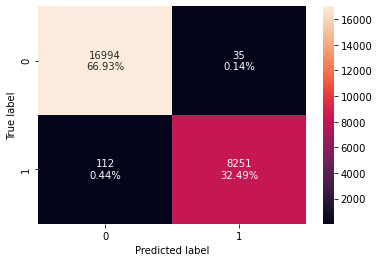

In [92]:
confusion_matrix_sklearn(model, X_train, y_train)

In [93]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* The model exhibits nearly zero errors on the training set, indicating that each sample has been classified accurately.

* Overall, the model demonstrates exceptional performance on the training dataset.

* It is important to note that a decision tree will keep growing and correctly classify each data point unless restrictions are imposed, which means it may learn all the patterns present in the training set.

* Next, we will evaluate the model's performance on the test dataset to determine if it is experiencing overfitting.

#### Checking model performance on test set

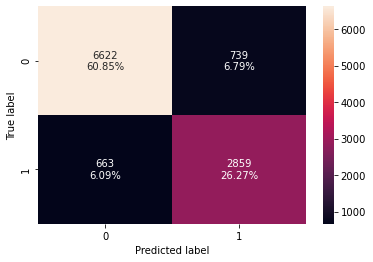

In [94]:
confusion_matrix_sklearn(model, X_test, y_test)

In [95]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

**Before pruning the tree let's check the important features.**

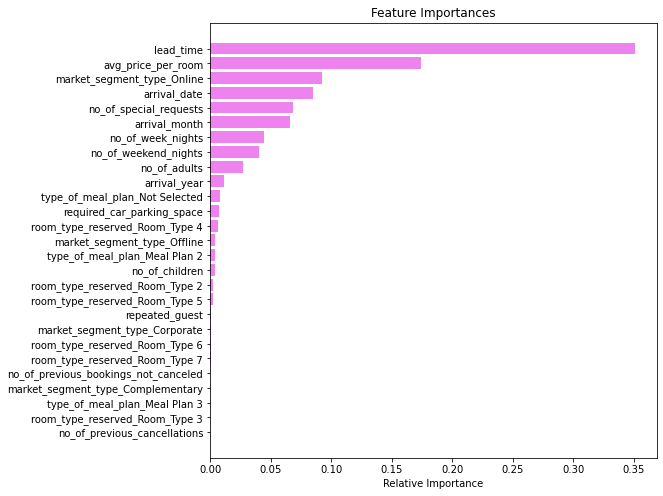

In [96]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room.
* Now let's prune the tree to see if we can reduce the complexity.

### Pruning the tree

**Pre-Pruning**

In [97]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

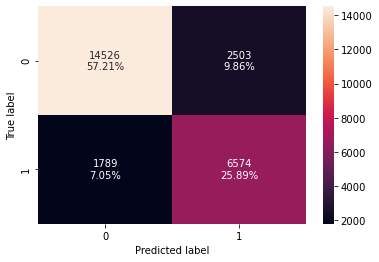

In [98]:
confusion_matrix_sklearn(estimator, X_train.astype(float), y_train.astype(float))

In [99]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Checking performance on test set

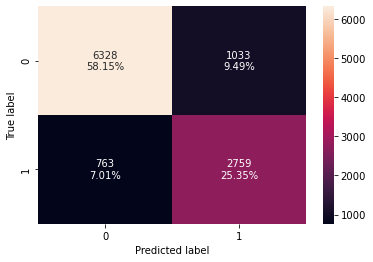

In [100]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [101]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


### Visualizing the Decision Tree

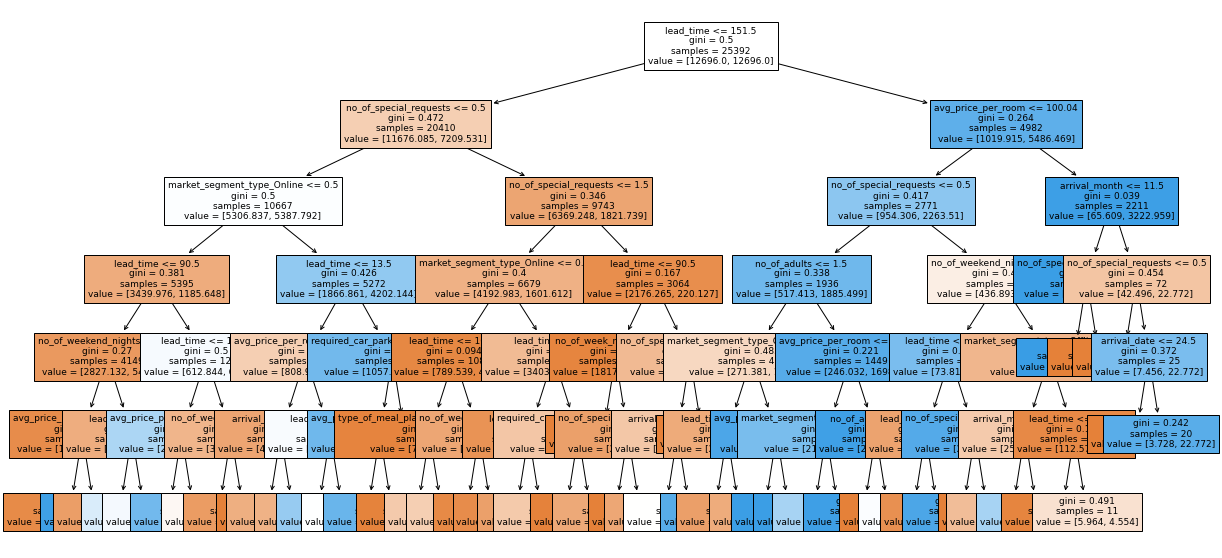

In [102]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [103]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

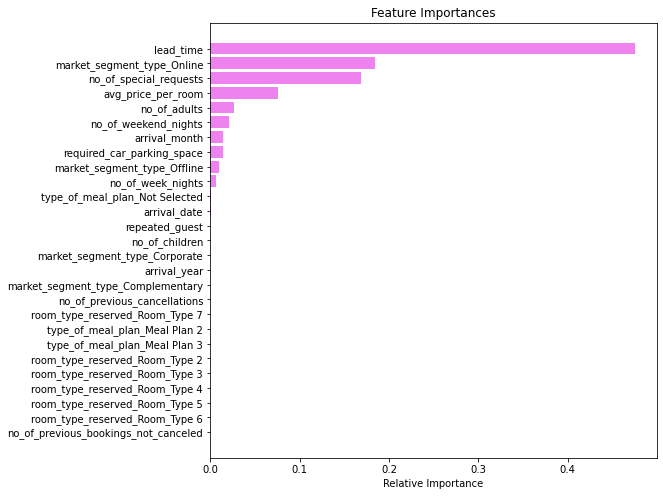

In [104]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from Decision Tree

* The decision tree has become more straightforward, and its rules are easily interpretable.

* The model's performance has been generalized.

* The most important features identified are:
    * Lead Time
    * Market Segment - Online
    * Number of Special Requests
    * Average Price per Room

**The rules derived from the decision tree can be interpreted as follows:**

* Lead time is a crucial factor in determining whether a booking will be canceled. The model considers 151 days as a threshold value for the first split.

**Bookings made more than 151 days before the date of arrival:**

* If the average price per room exceeds 100 euros and the arrival month is December, the booking is less likely to be canceled.
* If the average price per room is less than or equal to 100 euros and there are no special requests, the booking is likely to be canceled.

**Bookings made within 151 days before the date of arrival:**

* If a customer has at least one special request, the booking is less likely to be canceled.
* If no special requests were made and the booking was completed online, it is more likely to be canceled; if the booking was not made online, it is less likely to be canceled.

* For a more complex analysis, we can delve deeper into the tree structure.

**Cost Complexity Pruning**

In [105]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [106]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1889,0.00890,0.32806
1890,0.00980,0.33786
1891,0.01272,0.35058
1892,0.03412,0.41882


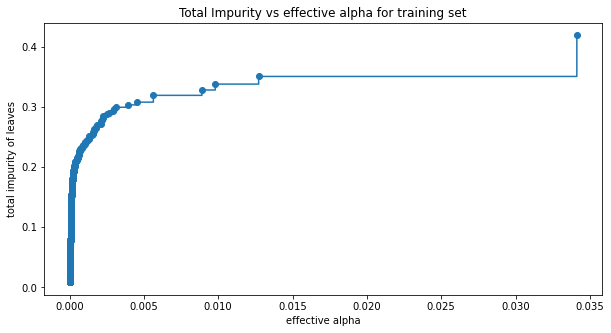

In [107]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [108]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136954


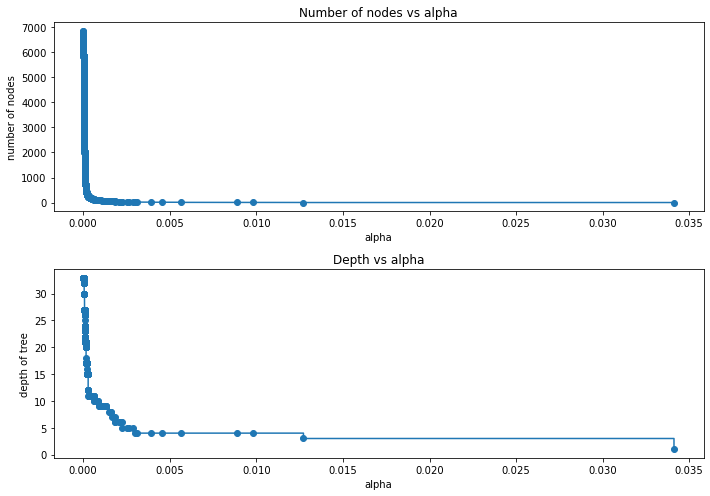

In [109]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [110]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

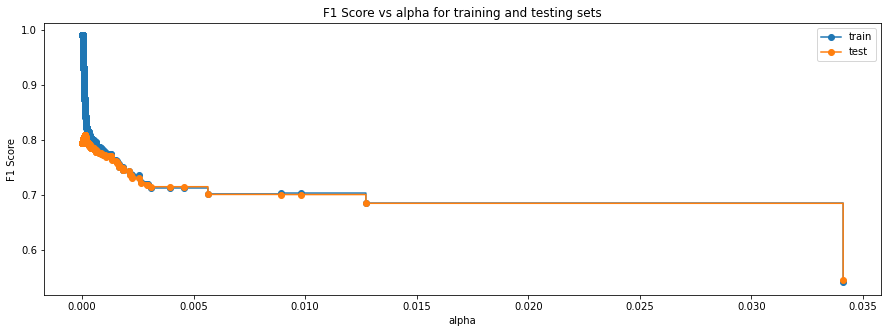

In [111]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [112]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516706, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

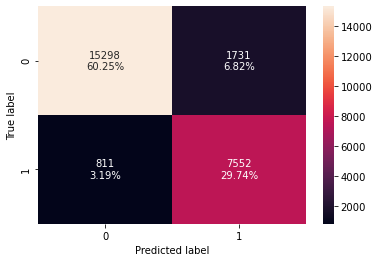

In [113]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [114]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89989,0.90303,0.81353,0.85594


#### Checking performance on test set

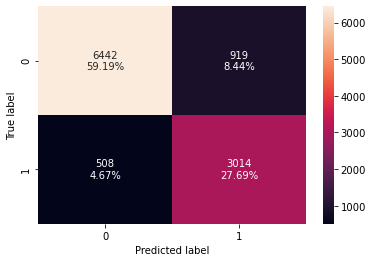

In [115]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [116]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86888,0.85576,0.76634,0.80858


**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

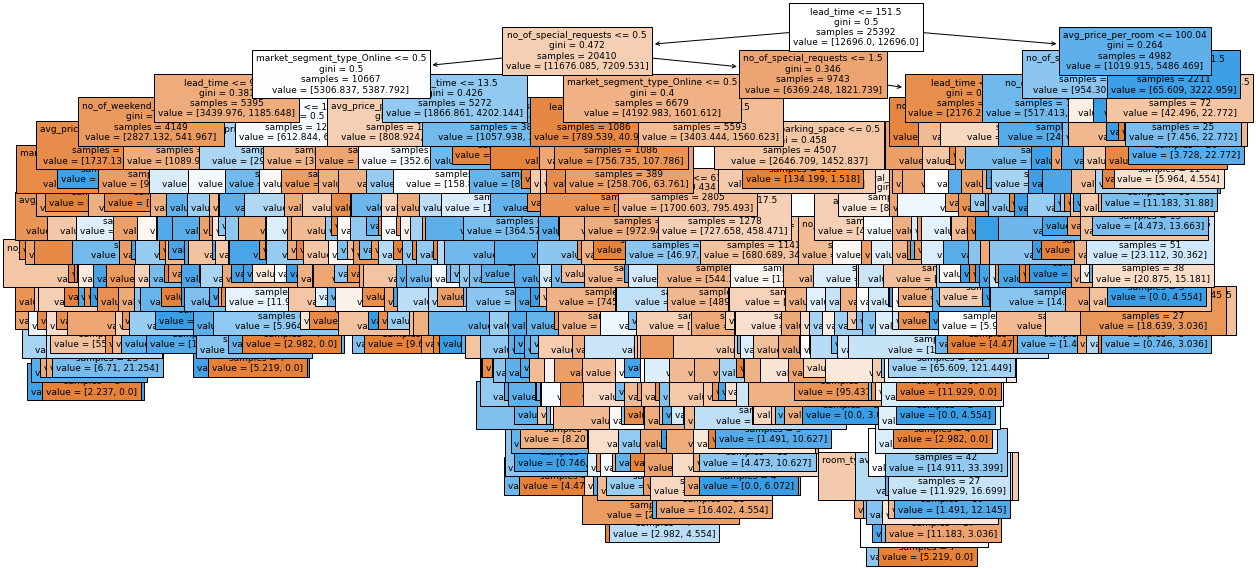

In [117]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [118]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

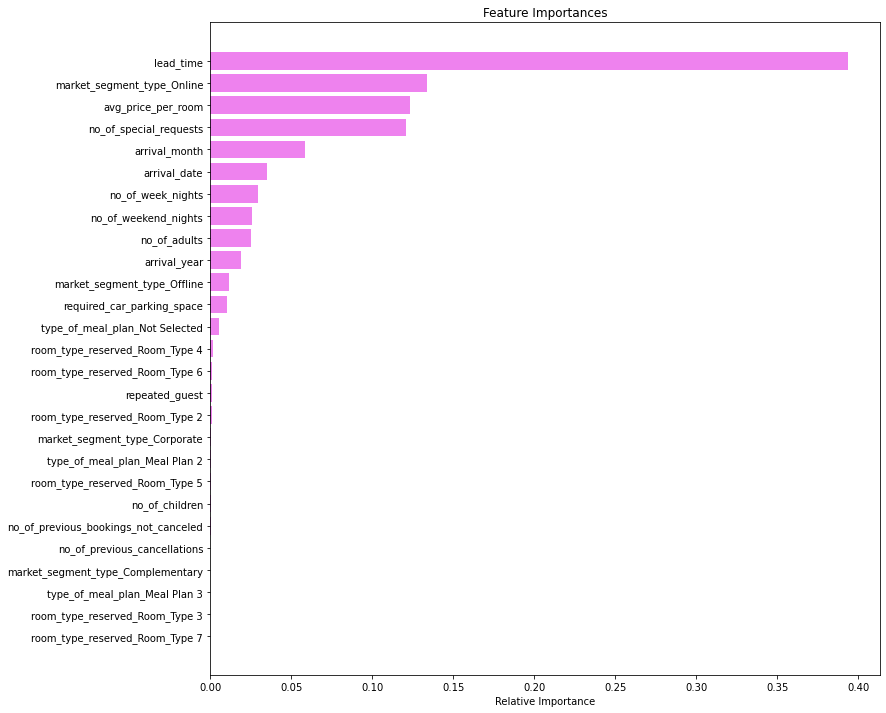

In [119]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

### Comparing Decision Tree models

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89989
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81353
F1,0.99117,0.75390,0.85594


In [121]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86888
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76634
F1,0.80309,0.75444,0.80858


**Observations**
* The decision tree model with default parameters exhibits overfitting to the training data, resulting in poor generalization.
* The pre-pruned tree demonstrates a balanced performance, achieving a good equilibrium between precision and recall.
* The post-pruned tree achieves a high F1 score compared to other models, but there is a significant disparity between precision and recall.
* By utilizing the pre-pruned decision tree model, the hotel can effectively balance resource management with brand equity.

# Actionable Insights and Recommendations

### Insights

* The Decision Tree model demonstrates superior performance on the dataset.

* By examining important variables based on p-values from the Logistic Regression and feature importance from the Decision Tree model, we find:
    * Lead Time, Number of Special Requests, and Average Price per Room are significant in both models.
    * The Logistic Regression model indicates that Lead Time and Average Price per Room have a positive relationship with the likelihood of bookings being canceled, while the Number of Special Requests has a negative relationship with cancellations.

### Business Recommendations

1. **Utilizing Lead Time and Special Requests**  
   The lead time and the number of special requests made by customers significantly influence the likelihood of booking cancellations. Bookings with special requests made less than 151 days prior to arrival are less likely to be canceled.

   * Based on this insight, the hotel can implement the following strategies:
       * Establish an automated email system to prompt customers for confirmation of their bookings and any changes prior to their arrival.
       * Send reminders to guests regarding important deadlines.

   This proactive approach will provide the hotel with adequate time to re-sell rooms or accommodate customer requests.

2. **Implementing Stricter Cancellation Policies**  
   The hotel can adopt more stringent cancellation policies, particularly for high-value bookings with special requests, as these involve significant resource commitment.

   * While the cancellation policies should be uniform across market segments, the analysis reveals a high cancellation rate for online bookings. Therefore, online cancellations should result in a reduced refund percentage.

   It's essential to clearly communicate the cancellation policies, refund terms, and fees on the hotel’s website or app before customers confirm their bookings.

3. **Restricting Length of Stay**  
   The analysis indicates that bookings exceeding five days have a higher cancellation risk.

   * The hotel could limit bookings to a maximum of five days, requiring guests wishing to stay longer to re-book. This policy could be relaxed for corporate and aviation segments to avoid impacting their experience negatively.

   Such restrictions can be strategically employed to enhance revenue.

4. **Resource Management During Peak Months**  
   The cancellation-to-non-cancellation ratio is notably low in December and January, likely due to holiday travel.

   * The hotel should ensure sufficient staff and resources are available to meet guest needs during these busy months.

5. **Investigating Cancellations in September and October**  
   Although September and October see the highest booking volumes, they also experience significant cancellations. This discrepancy warrants further investigation by the hotel.

6. **Enhancing Post-Booking Interactions**  
   Initiating interactions with customers after booking can demonstrate the level of care they can expect from the hotel.

   * To personalize the guest experience, share information about local events, attractions, and other relevant insights periodically.

7. **Improving Loyalty Among Repeat Customers**  
   The analysis indicates a low number of repeat customers, but those who do return show minimal cancellations, which is a positive sign. Repeat customers are crucial for the hospitality industry as they contribute to word-of-mouth marketing.

   * Since loyal guests tend to be more profitable due to their familiarity with the hotel's offerings, the hotel should focus on enhancing their experience.
   * Implementing a loyalty program that offers special discounts, access to exclusive services, and other incentives can help foster repeat business.


___